<a href="https://colab.research.google.com/github/Nisarg619/Machile-Learning/blob/main/Practical_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   CustomerID  Age  Annual Income  Spending Score
0           1   19             15              39
1           2   21             15              81
2           3   20             16               6
3           4   23             16              77
4           5   31             17              40


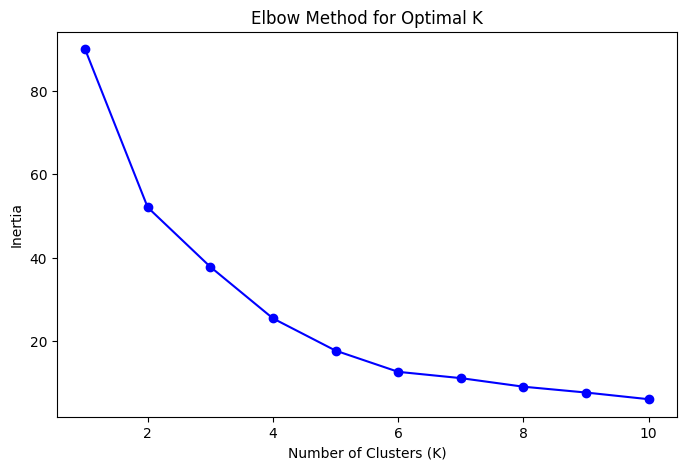

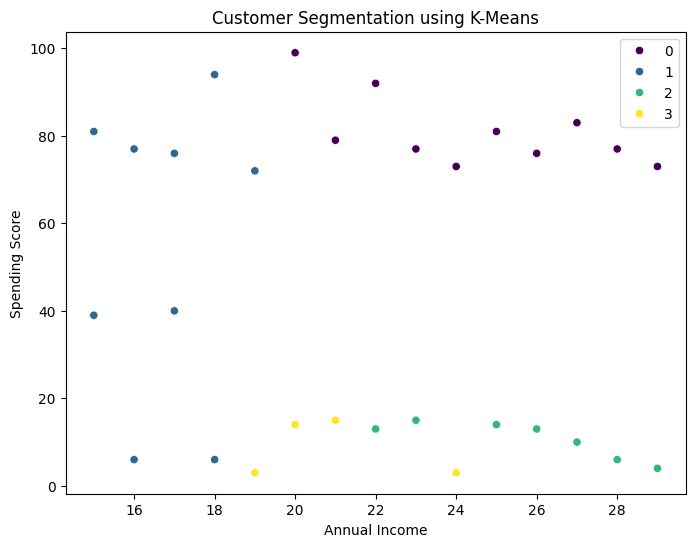

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

# Load dataset
df = pd.read_csv("/content/Practical_05.csv")  # Replace with actual dataset

# Display first few rows
print(df.head())

# Selecting relevant features
features = ['Age', 'Annual Income', 'Spending Score']
df_selected = df[features]

# Standardizing data for better clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Finding the optimal number of clusters using Elbow Method
inertia = []
K = range(1, 11)  # Checking for clusters 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Applying K-Means with optimal K (assuming 4 clusters from the elbow method)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)
df['Cluster'] = clusters

# Visualizing clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income'], y=df['Spending Score'], hue=df['Cluster'], palette='viridis')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation using K-Means')
plt.legend()
plt.show()

In [2]:
# BONUS: Compare with DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_clusters = dbscan.fit_predict(df_scaled)

df['DBSCAN_Cluster'] = db_clusters
silhouette_kmeans = silhouette_score(df_scaled, clusters)
silhouette_dbscan = silhouette_score(df_scaled, db_clusters) if len(set(db_clusters)) > 1 else "N/A"

print(f"Silhouette Score for K-Means: {silhouette_kmeans}")
print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")

Silhouette Score for K-Means: 0.40747889222403566
Silhouette Score for DBSCAN: N/A
